### Preamble

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [2]:
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot
import numpy as numpy

### Hill Functions

In [3]:
def hill_act(s, n, Vmax, K):
    return Vmax*(s ** n) / ((K ** n) + s ** n)

def hill_rep(s, n, Vmax, K):
    return Vmax / (1 + (s/K ** n))

# Simple Autoregulation


$\frac{dA}{dt} = \alpha - \beta [A]$

In [4]:
def simple(conc, t):
    A = conc
    alpha = 0.5
    beta = 0.5
    return beta - alpha*A

In [5]:
initial = 0.0
t = numpy.linspace(0,10,1000)
result_simple = integrate.odeint(simple,initial,t)

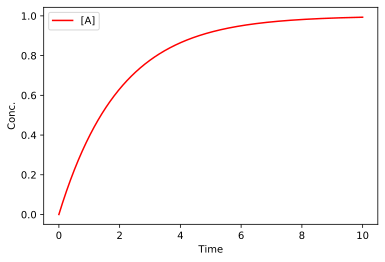

In [6]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(t,result_simple[:,0],'r',label='[A]')


ax.set_xlabel('Time')
ax.set_ylabel('Conc.')
pyplot.legend()

# Negative Autoregulation


<img src="../images/NAR.png" alt="NAR" style="width: 200px;"/>

$\frac{dA}{dt} = \frac{\beta}{1+\left( \frac{[A]}{K} \right)^n} - \alpha [A]$

In [7]:
def nar(A, t):
    alpha = 2.0
    beta = 2.0
    K = 2.0
    n = 10
    return hill_rep(A,n,beta,K) - alpha*A
    
    

In [8]:
initial = 0.0
t = numpy.linspace(0,10,1000)
result_nar = integrate.odeint(nar,initial,t)

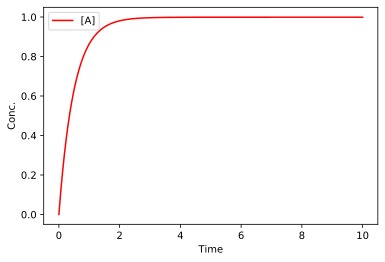

In [9]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(t,result_nar[:,0],'r',label='[A]')

ax.set_xlabel('Time')
ax.set_ylabel('Conc.')
pyplot.legend()

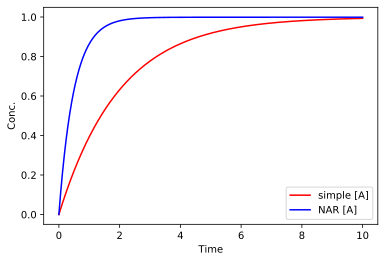

In [10]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(t,result_simple[:,0],'r',label='simple [A]')
pyplot.plot(t,result_nar[:,0],'b',label='NAR [A]')

ax.set_xlabel('Time')
ax.set_ylabel('Conc.')
pyplot.legend()


## Positive Autoregulation


<img src="../images/PAR.png" alt="PAR" style="width: 200px;"/>

In [11]:
def par(A, t):
    alpha = 0.05
    beta = 0.05
    K = 0.5
    n = 10
    return hill_act(A,n,beta,K) - alpha*A

In [12]:
t = numpy.linspace(0,100,1000)
result_par = [integrate.odeint(par,start,t) for start in numpy.linspace(0.1,1.0,8)]

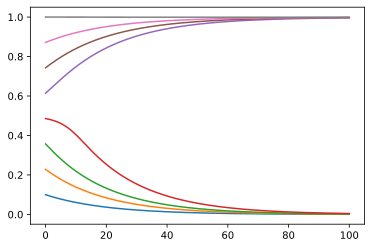

In [13]:
for p in result_par:
    pyplot.plot(t,p,label="A0=" + str(p[0]))


In [14]:
alpha = 0.05
beta = 0.05
K = 0.5
n = 10
A = numpy.linspace(-0.1,1.1,90)
production = [hill_act(a,n,beta,K) for a in A]
depletion = [a*alpha for a in A]

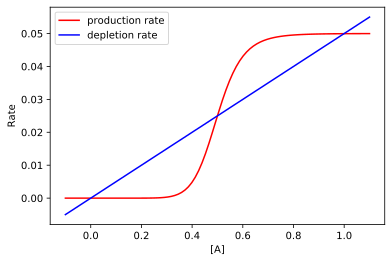

In [15]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(A,production,'r',label='production rate')
pyplot.plot(A,depletion,'b',label='depletion rate')

ax.set_xlabel('[A]')
ax.set_ylabel('Rate')
pyplot.legend(loc=2)